# Lab | Cleaning numerical data

In [134]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

In [135]:
# Loading the data into the variable customer_df
customer_df = pd.read_csv('files_for_lab/customer_value_analysis.csv')

In [136]:
# Looking at the main features of the dataset
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [137]:
customer_df.shape

(9134, 24)

In [138]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [139]:
# Renaming the columns
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')

In [140]:
# Changing the type of effective_to_date column to DateTime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')

In [141]:
#Check null values
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [142]:
# Defining a function to separate numerical and categorical columns
def num_cat_split(df):
    num_df = pd.DataFrame(df.select_dtypes(include='number'))
    cat_df = pd.DataFrame(df.select_dtypes(include='object'))
    return num_df, cat_df

num_df, cat_df = num_cat_split(customer_df)

In [143]:
# Dropping any ID column
cat_df = cat_df.drop(['customer'], axis=1)

In [144]:
cat_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


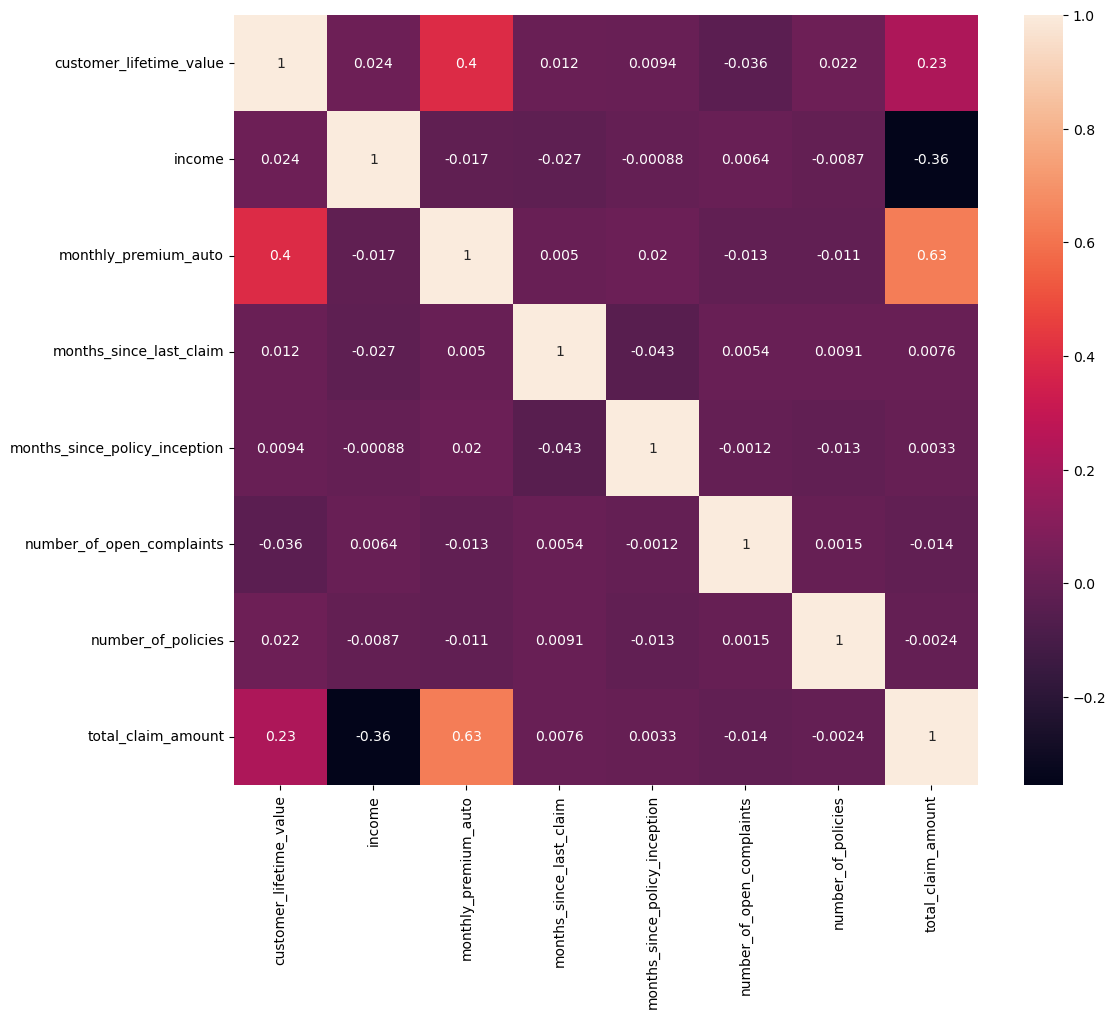

In [145]:
corr_matrix = num_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [146]:
def cont_disc_split(dataframe, n=36):
    cont_df = pd.DataFrame()
    disc_df = pd.DataFrame()
    for col in dataframe.columns:
        if len(dataframe[col].unique()) > n:
            cont_df[col] = dataframe[col]
        else:
            disc_df[col] = dataframe[col]
    return cont_df, disc_df

In [147]:
continuous_df, discrete_df = cont_disc_split(num_df)

In [148]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [149]:
discrete_df

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


In [150]:
def barplot_discrete_df(dataframe):
    for col in dataframe.columns:
        plt.figure(figsize=(16, 6))
        sns.countplot(x=col, data=dataframe)
        plt.show()


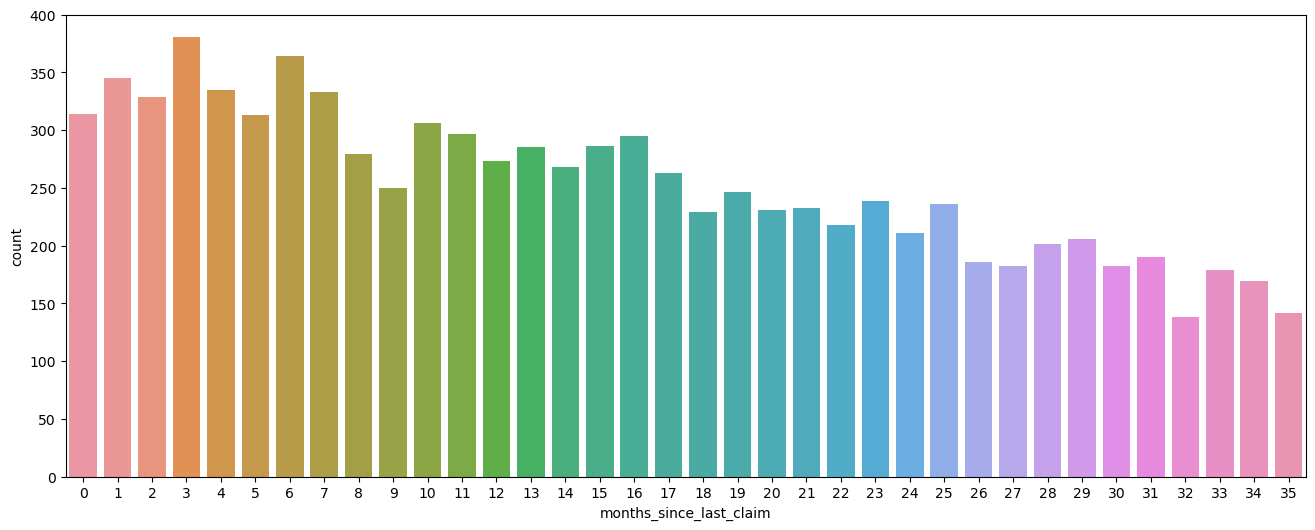

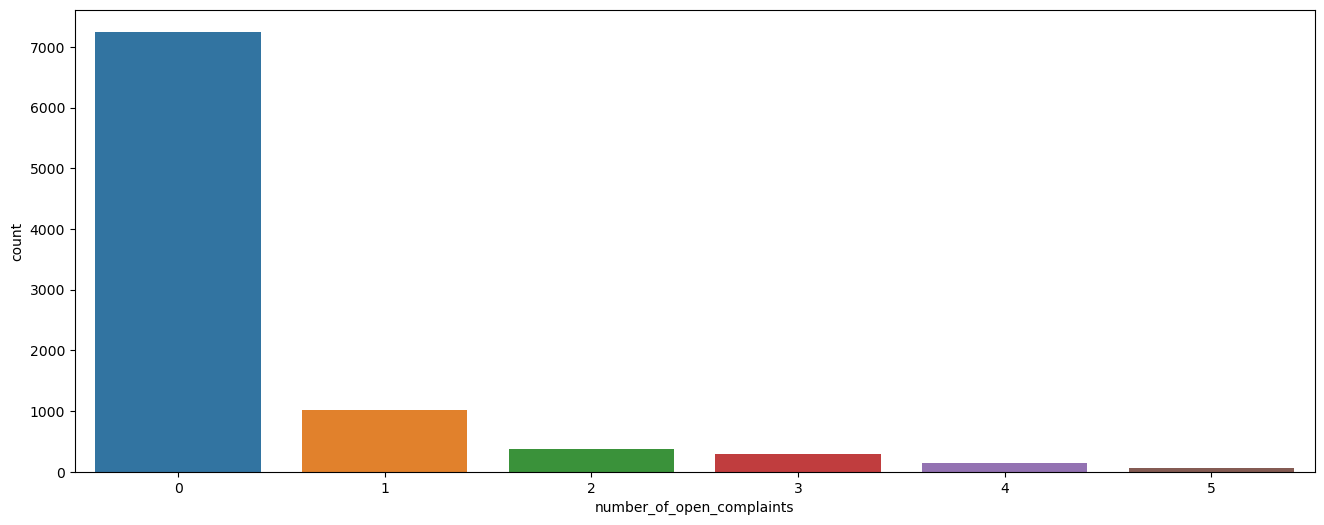

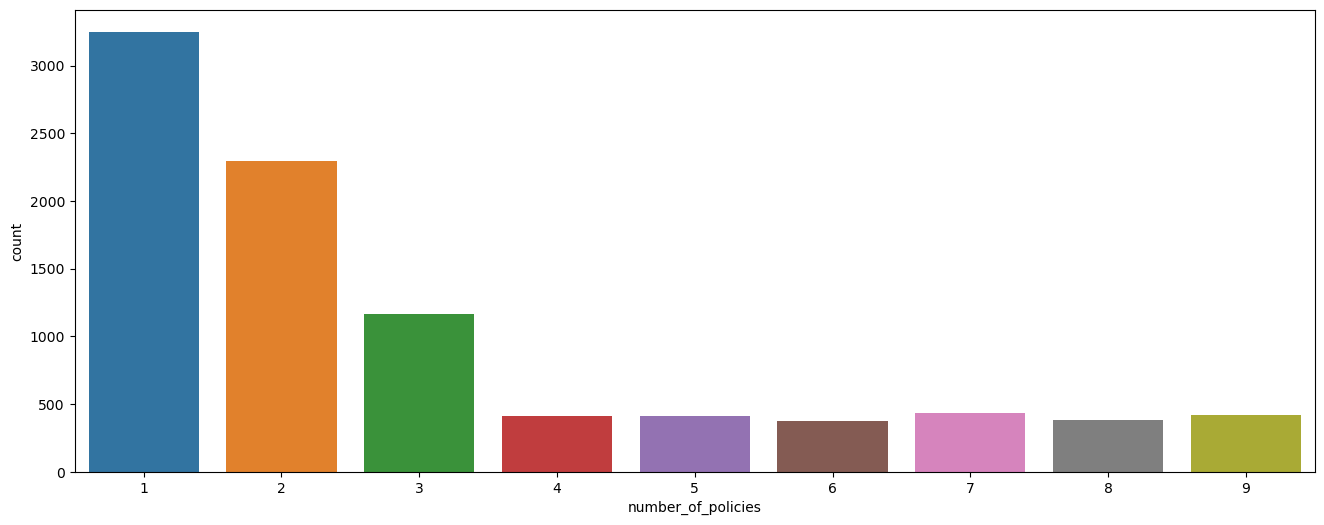

In [151]:
barplot_discrete_df(discrete_df)

In [152]:
def histplot_continuous_df(dataframe):
    for col in dataframe.columns:
        plt.figure(figsize=(16, 6))
        sns.histplot(x=col, data=dataframe)
        plt.show()


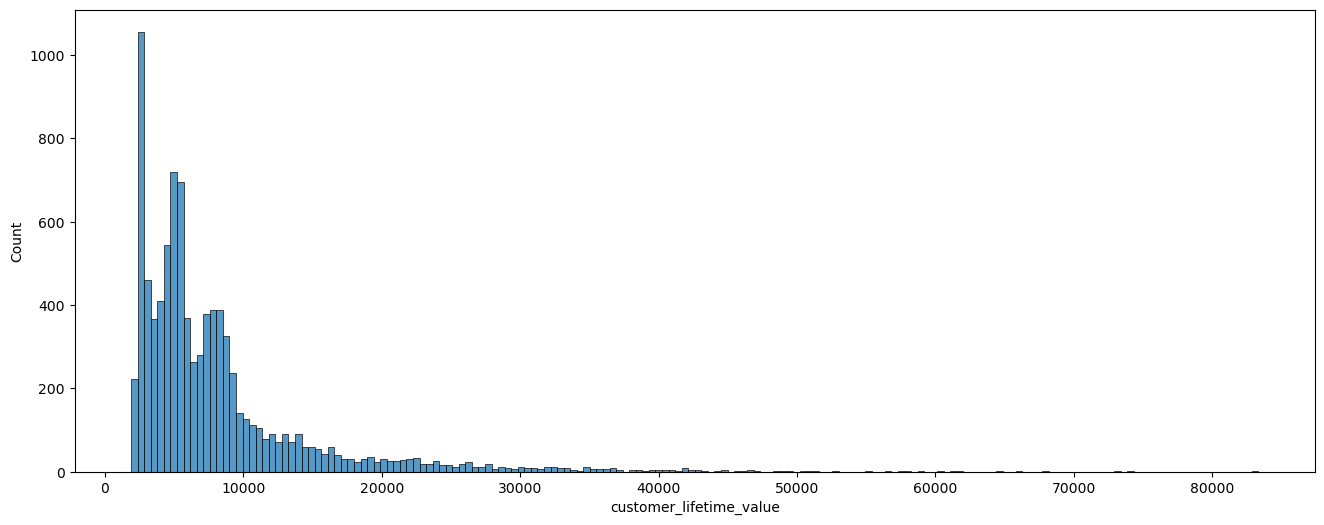

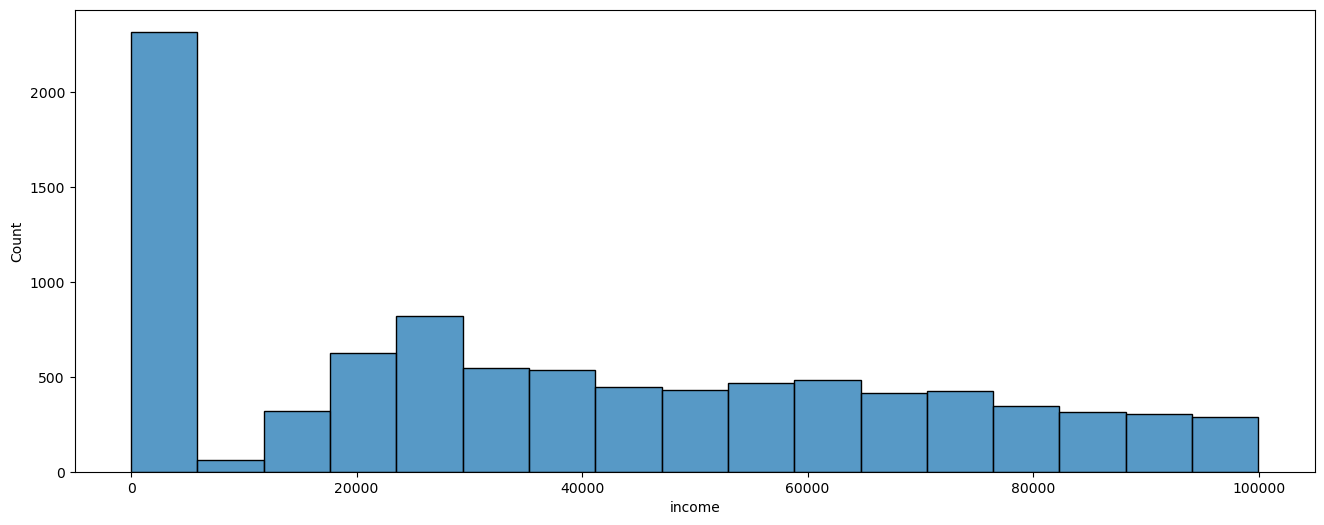

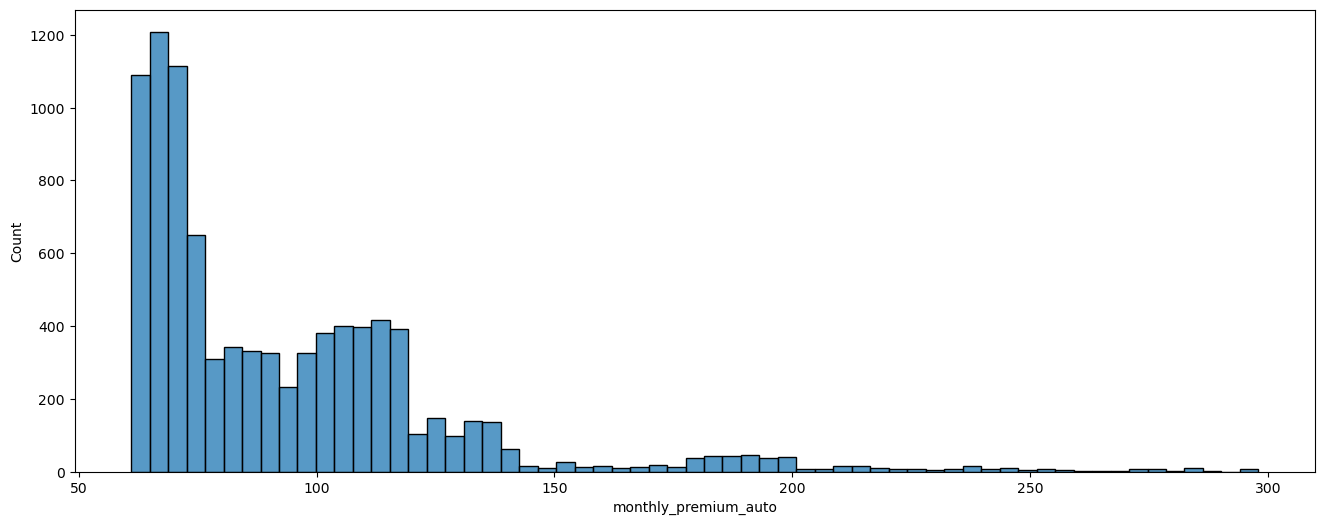

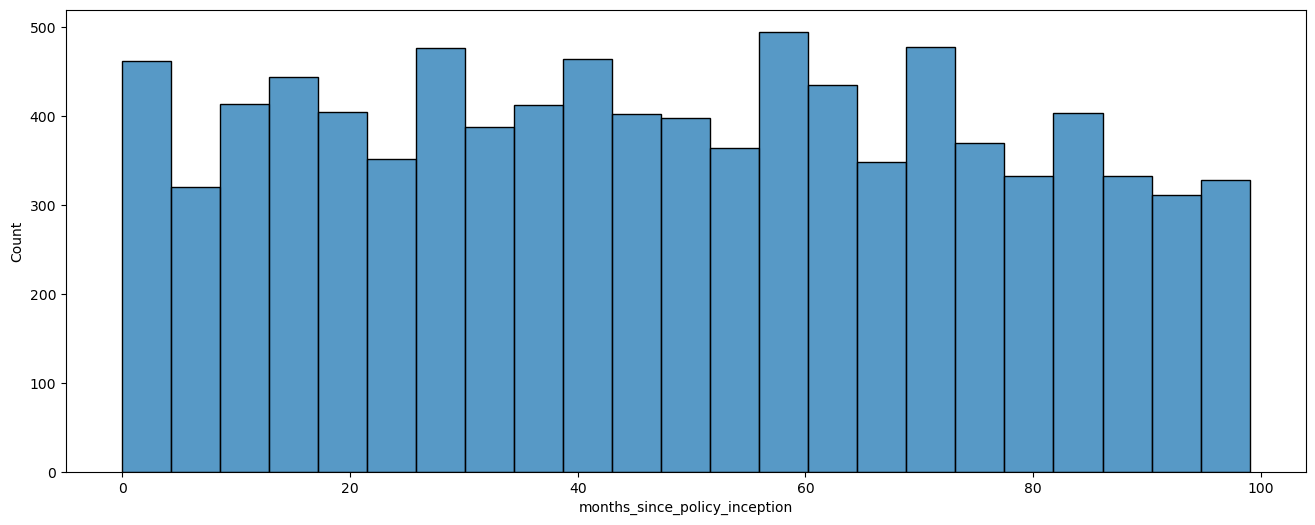

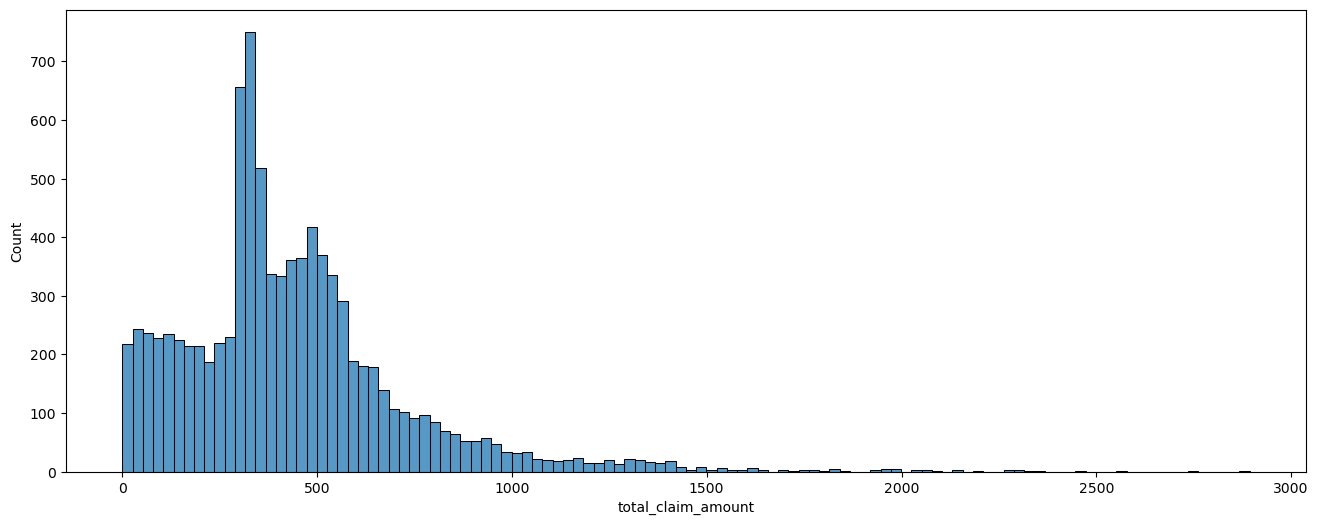

In [153]:
histplot_continuous_df(continuous_df)

In [154]:
#Yes transformation would have to be applied as data is skewed.

In [155]:
def boxplot_continuous_df(dataframe):
    for col in dataframe.columns:
        plt.figure(figsize=(16, 6))
        sns.boxplot(x=col, data=dataframe)
        plt.show()

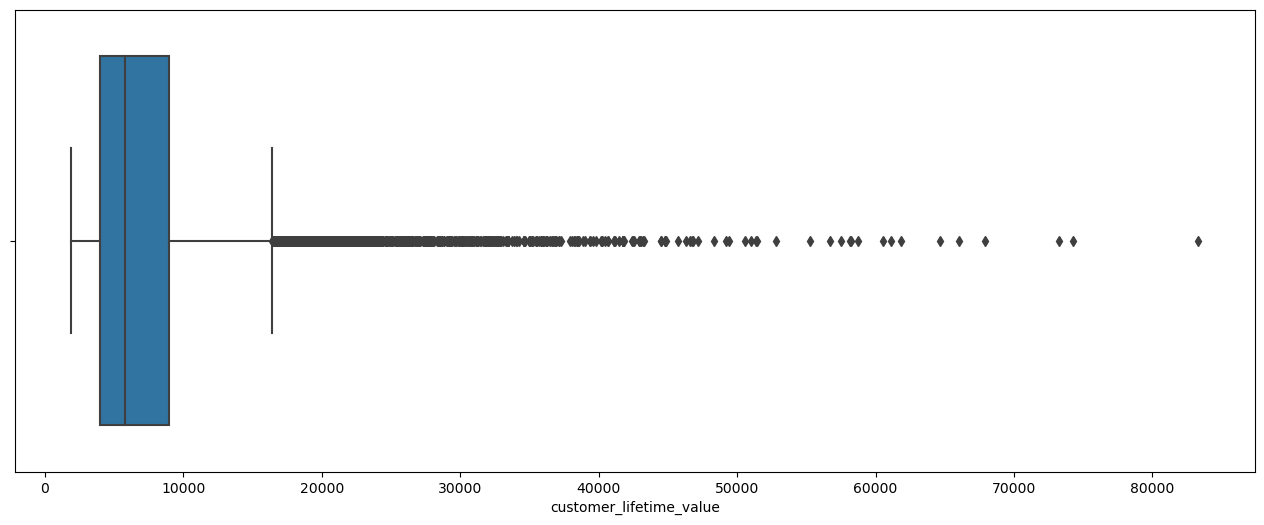

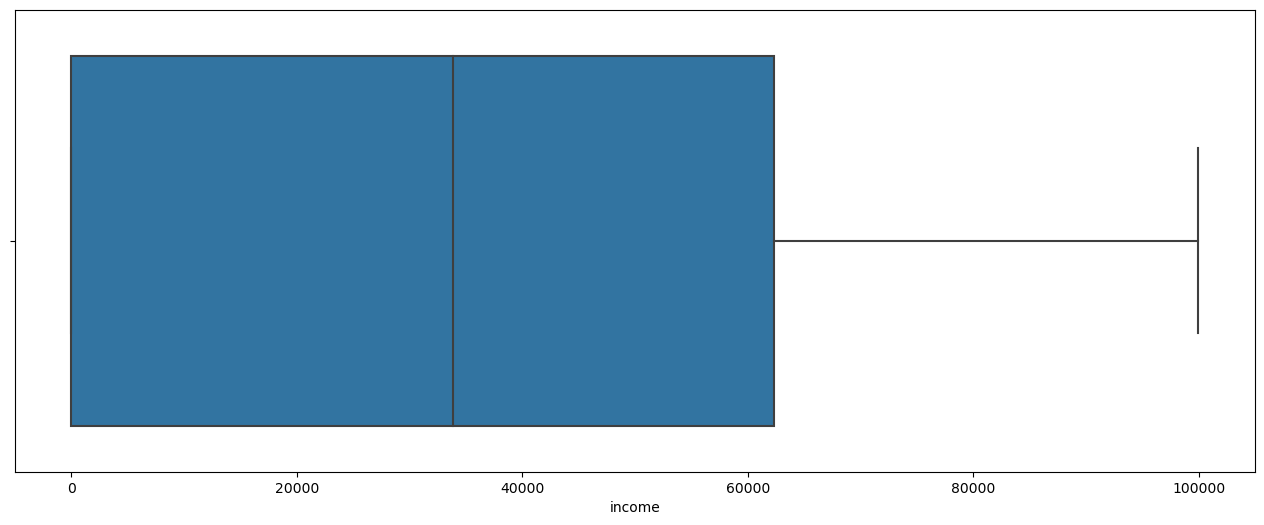

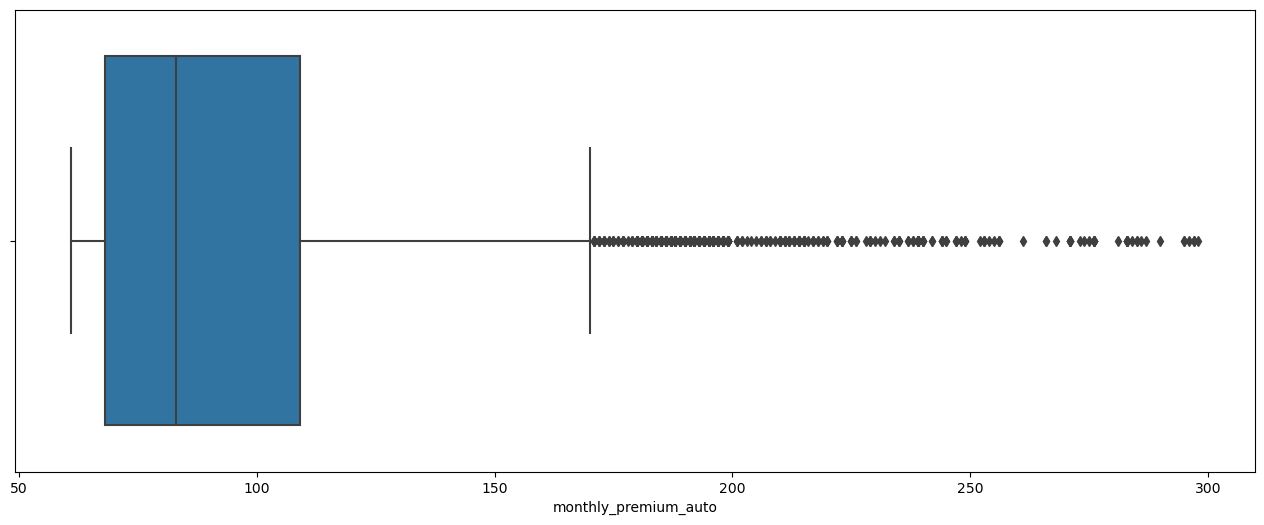

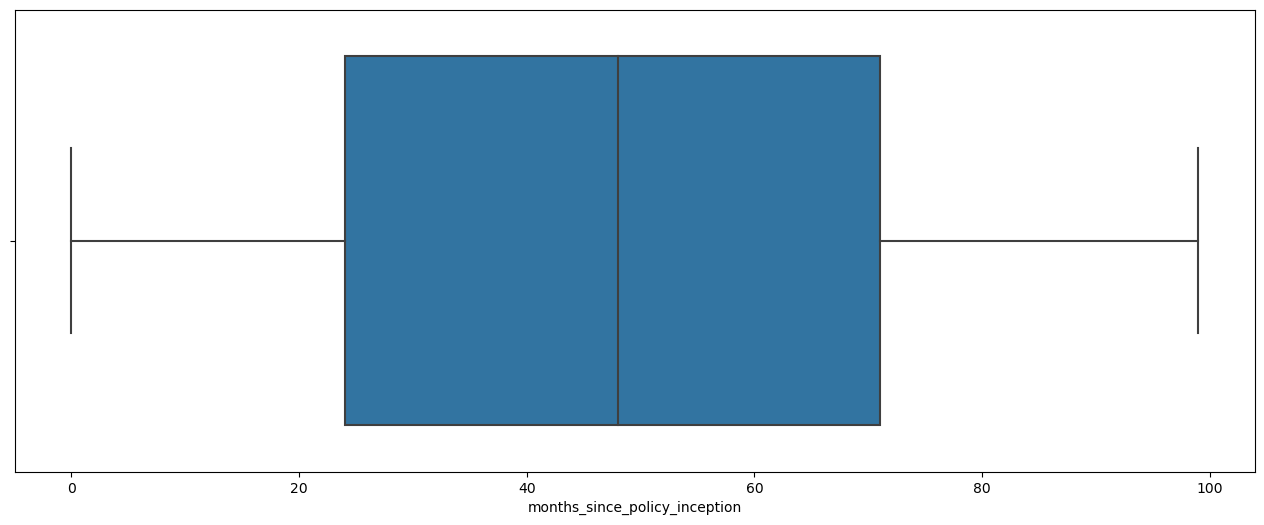

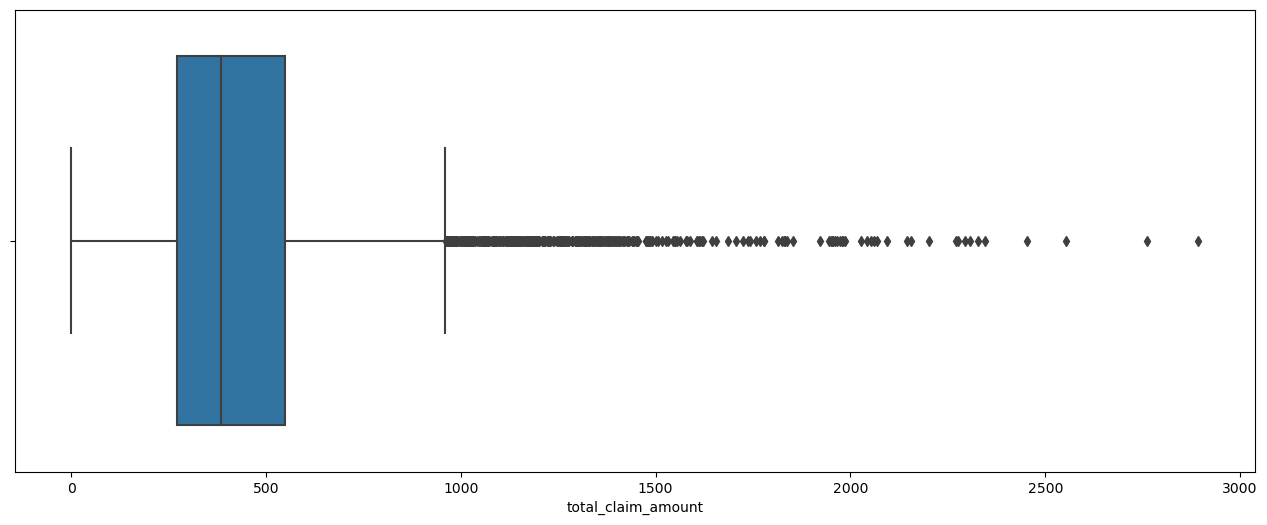

In [156]:
boxplot_continuous_df(continuous_df)

# Lab | Cleaning categorical data

In [157]:
#Define function that given a pandas df as input creates a seaborn count plot of each categorical column,

In [158]:
def categorical_df(dataframe):
    cat_df = dataframe.select_dtypes(include='object')
    for col in cat_df.columns:
        if len(cat_df[col].unique()) < 6:
            plt.figure(figsize=(12, 8))
            sns.countplot(x=col, data=cat_df, order=cat_df[col].value_counts().index)
            plt.xticks(rotation=45)
            plt.show()
        else:
            plt.figure(figsize=(12, 8))
            sns.countplot(y=col, data=cat_df, order=cat_df[col].value_counts().index)
            plt.show()


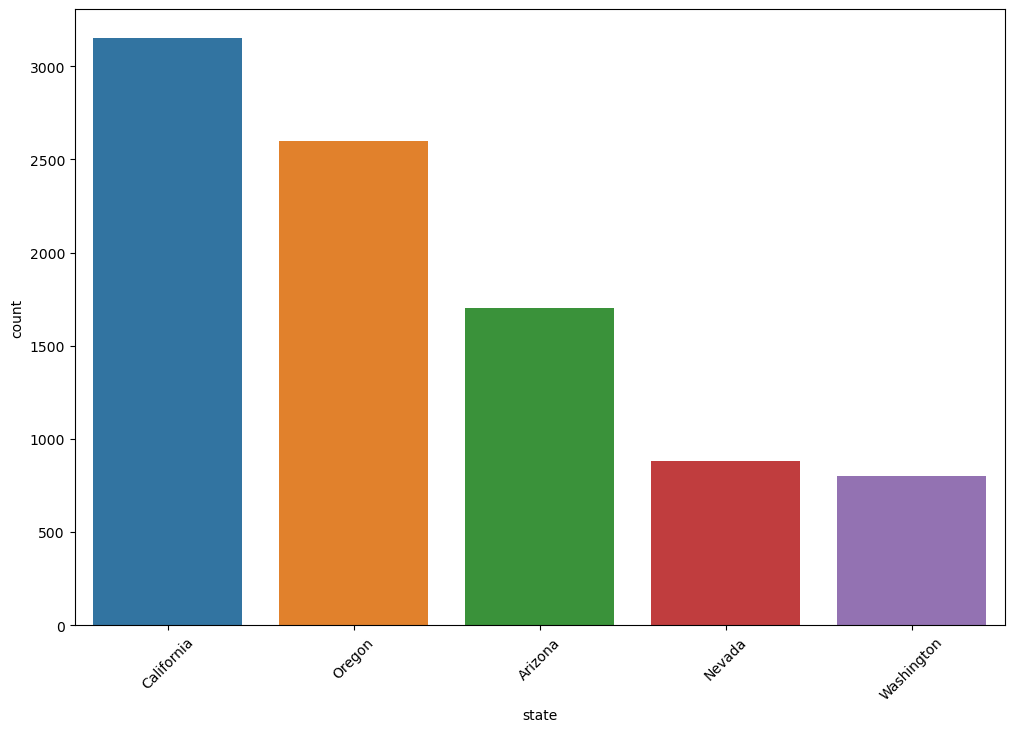

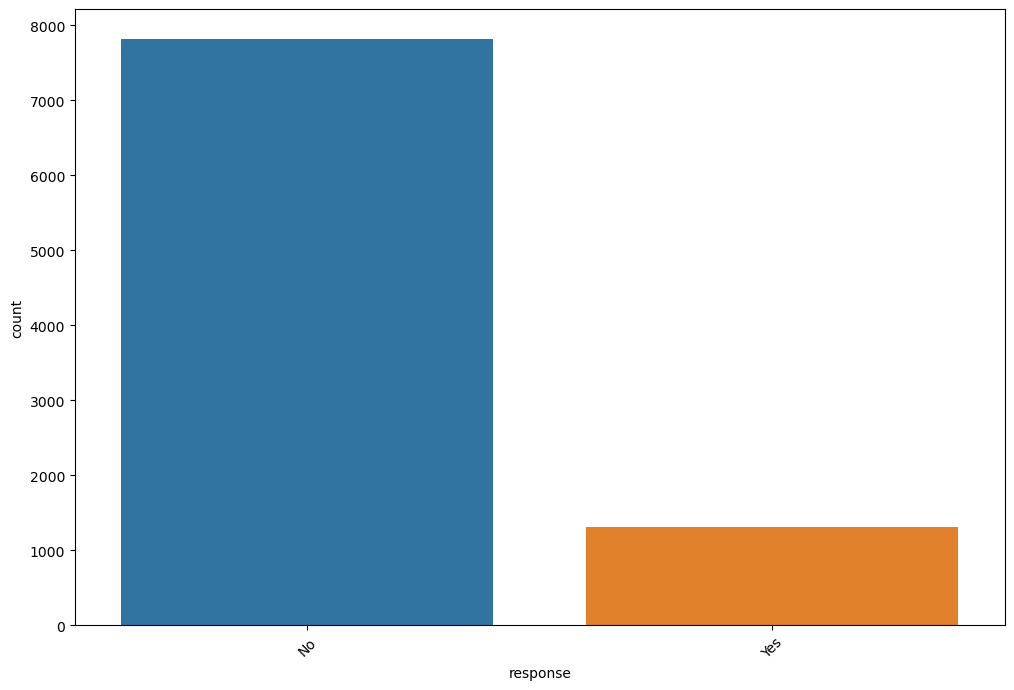

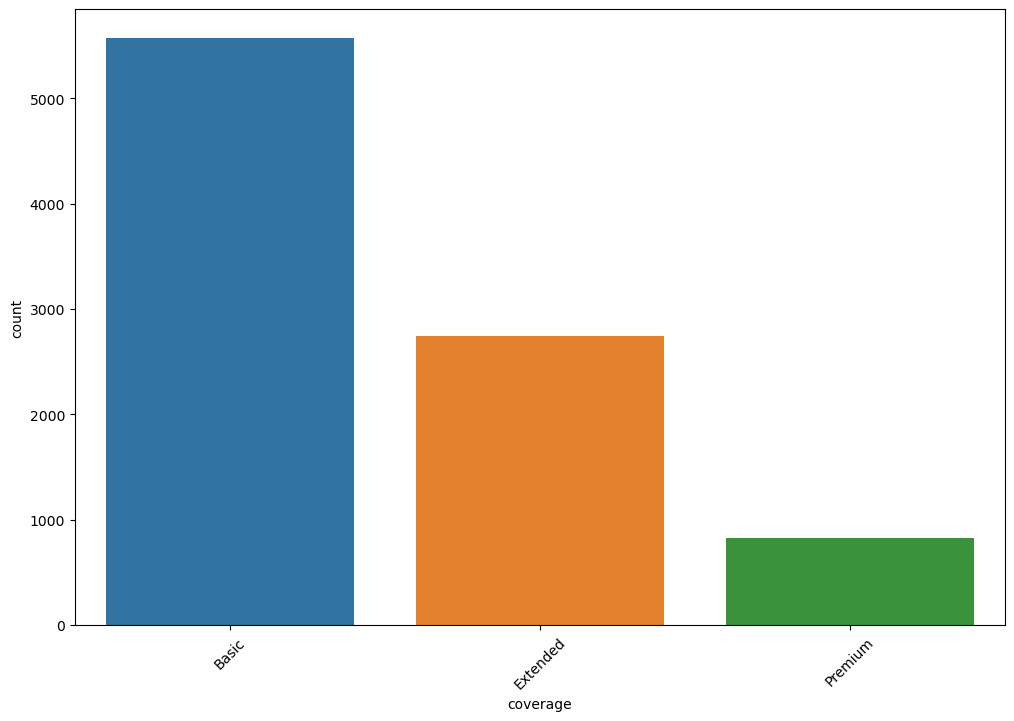

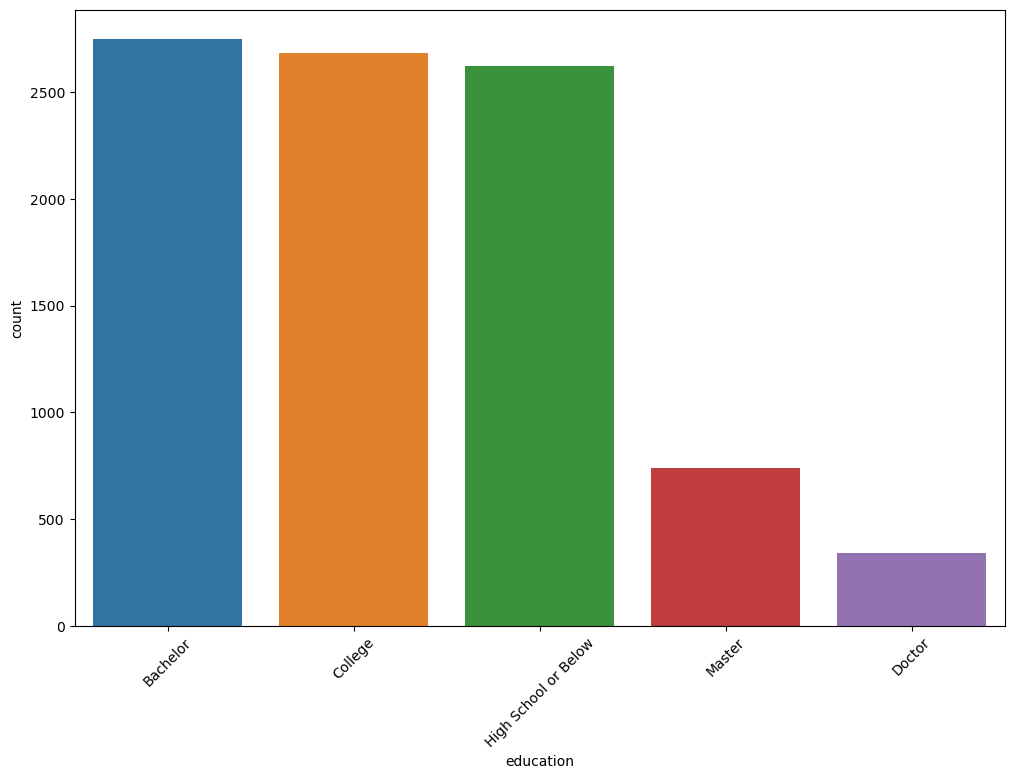

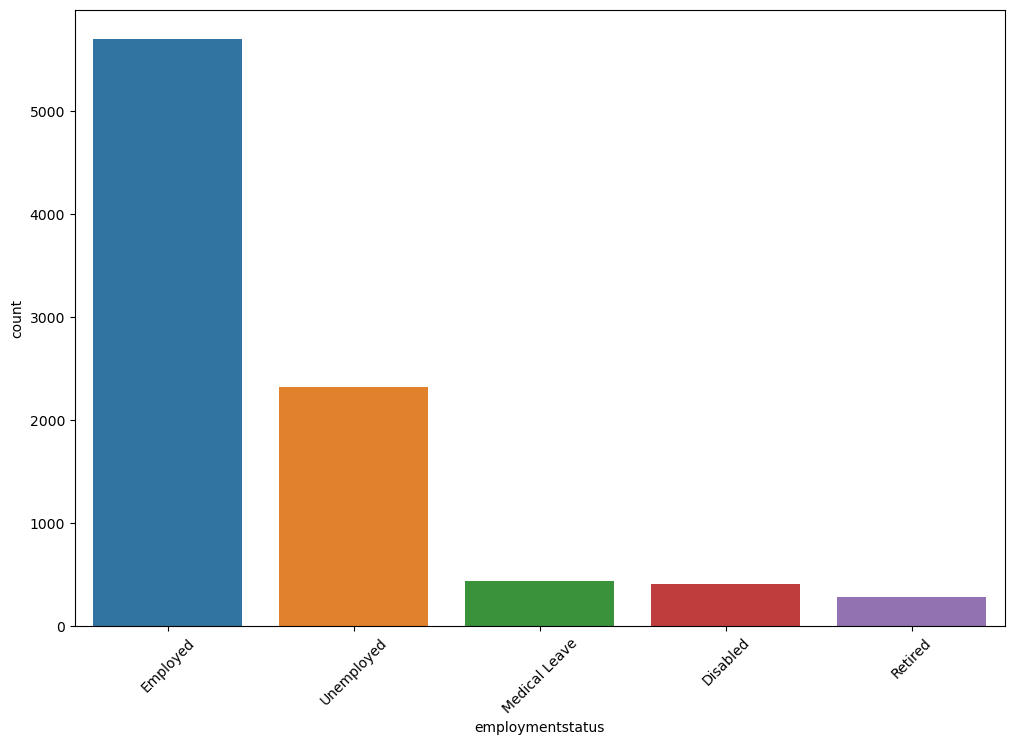

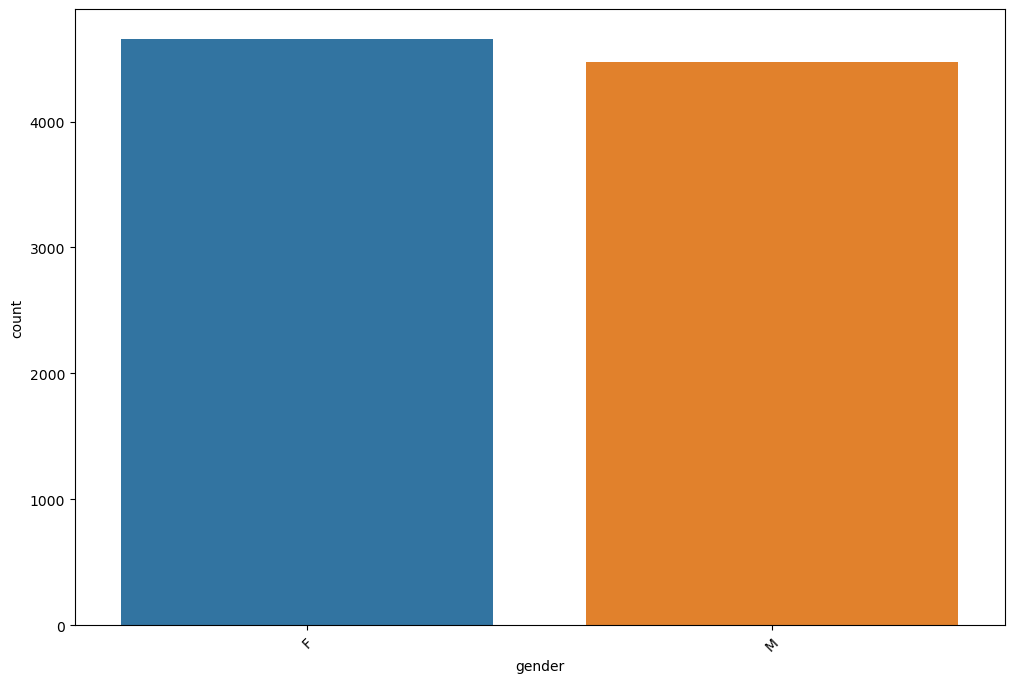

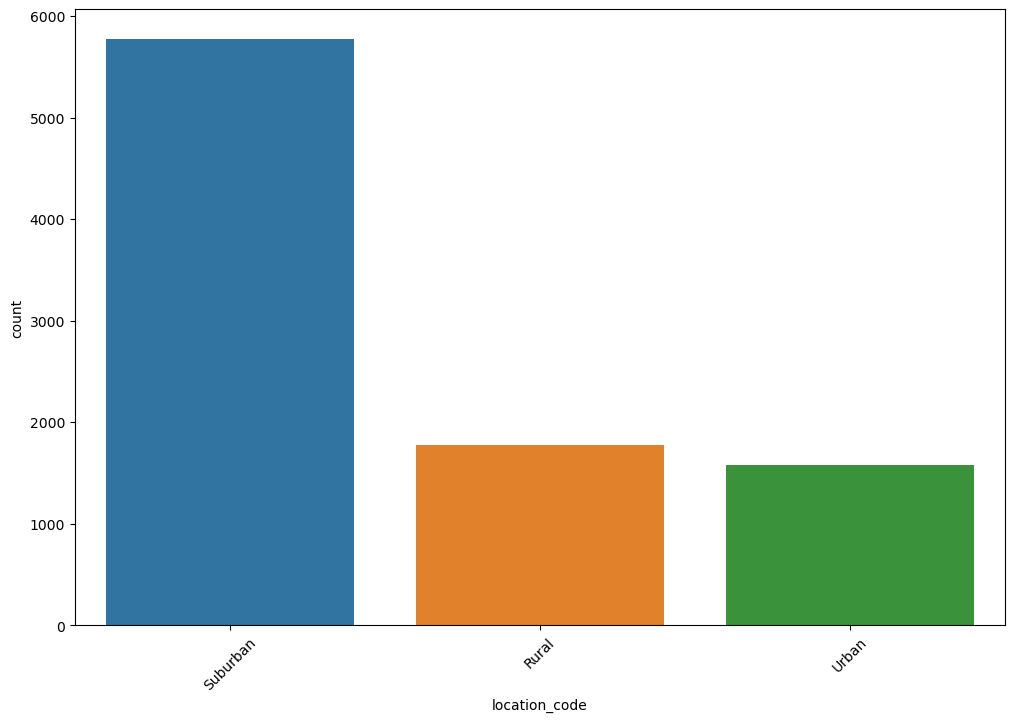

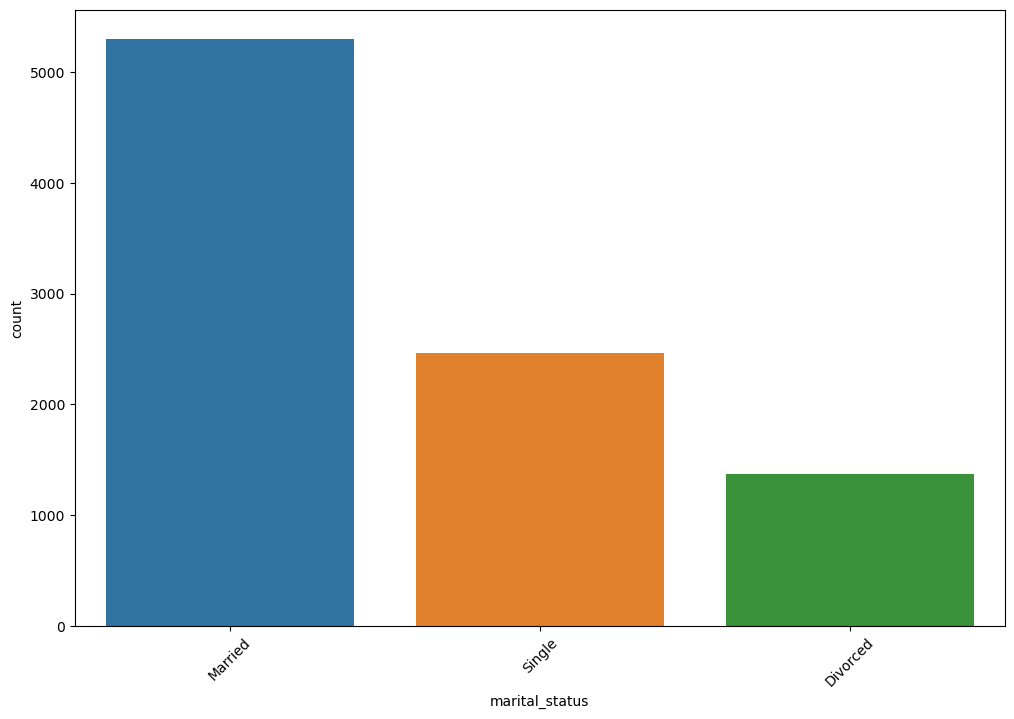

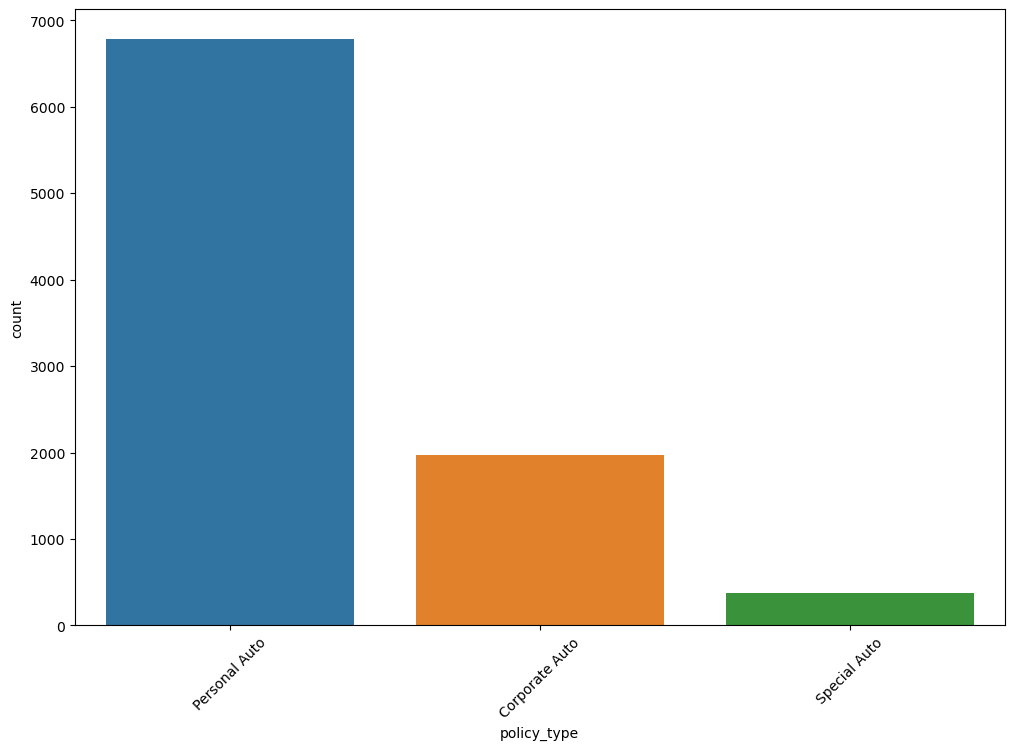

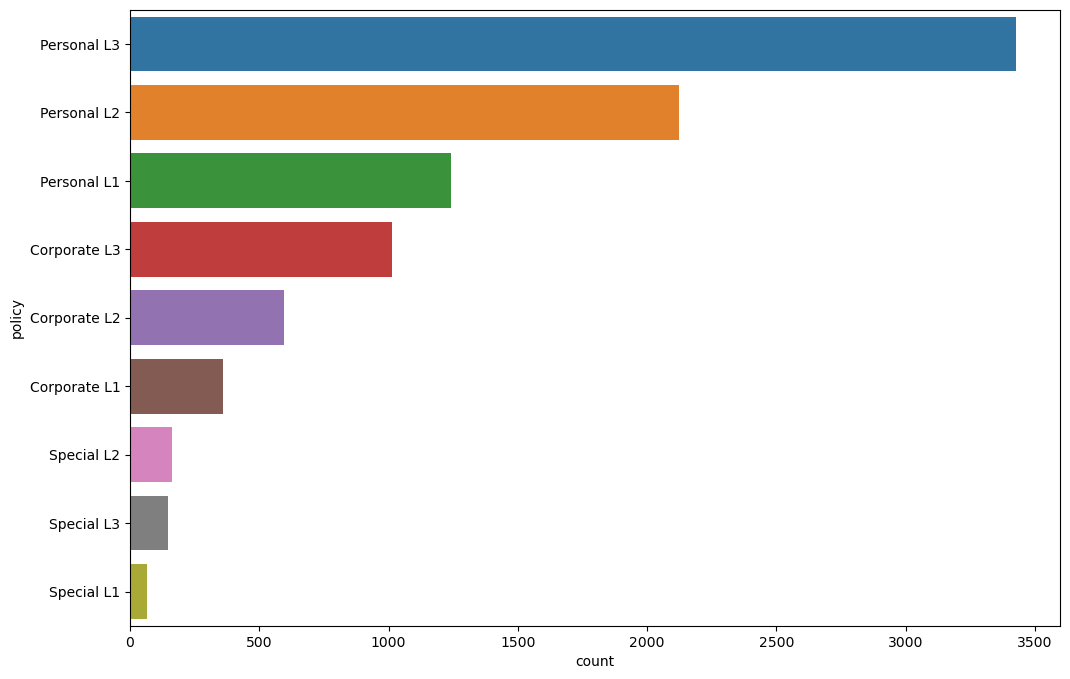

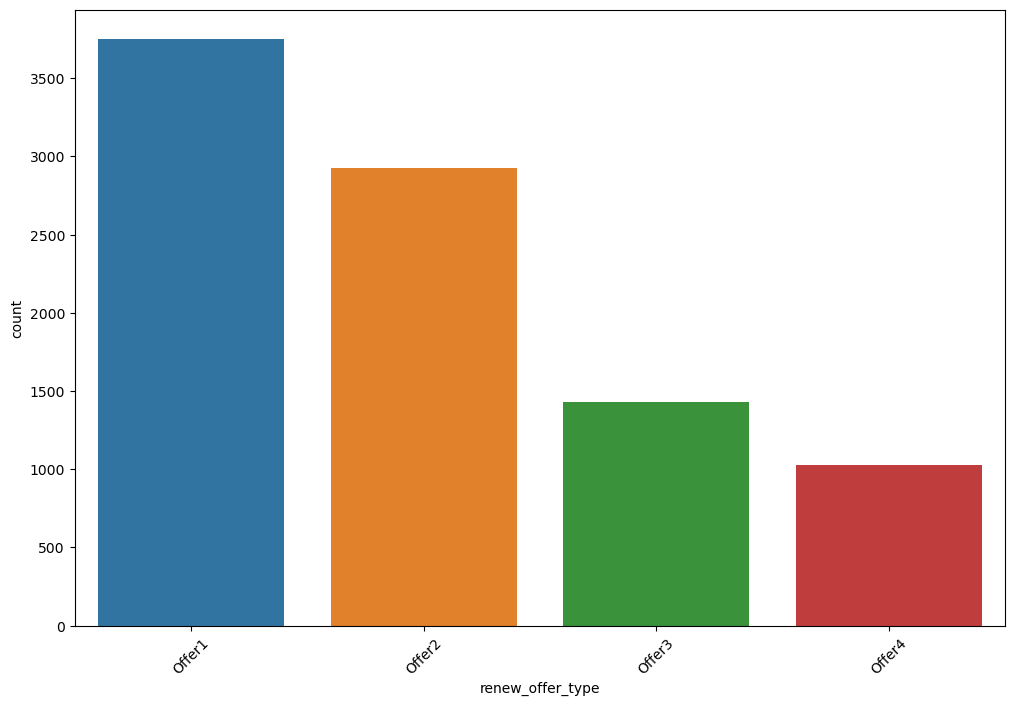

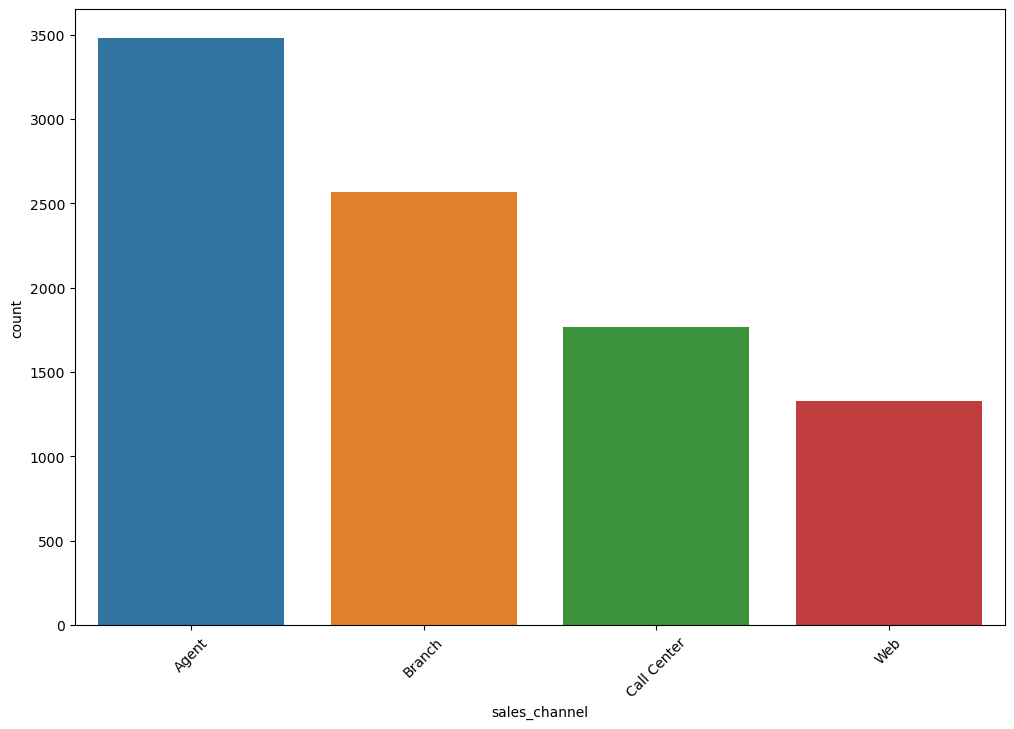

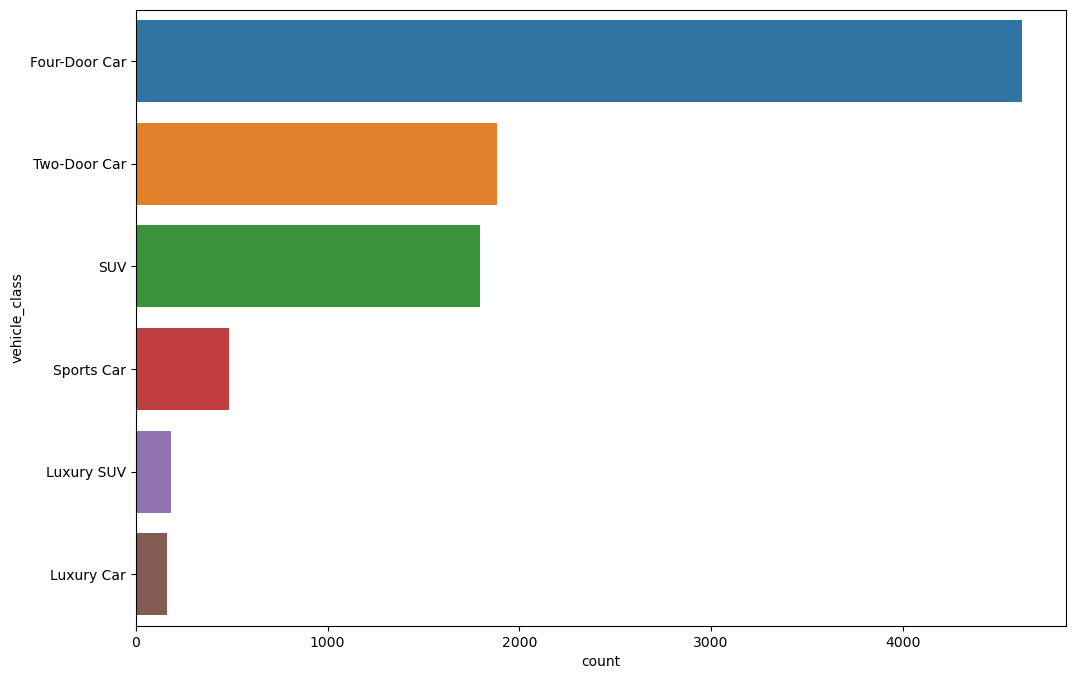

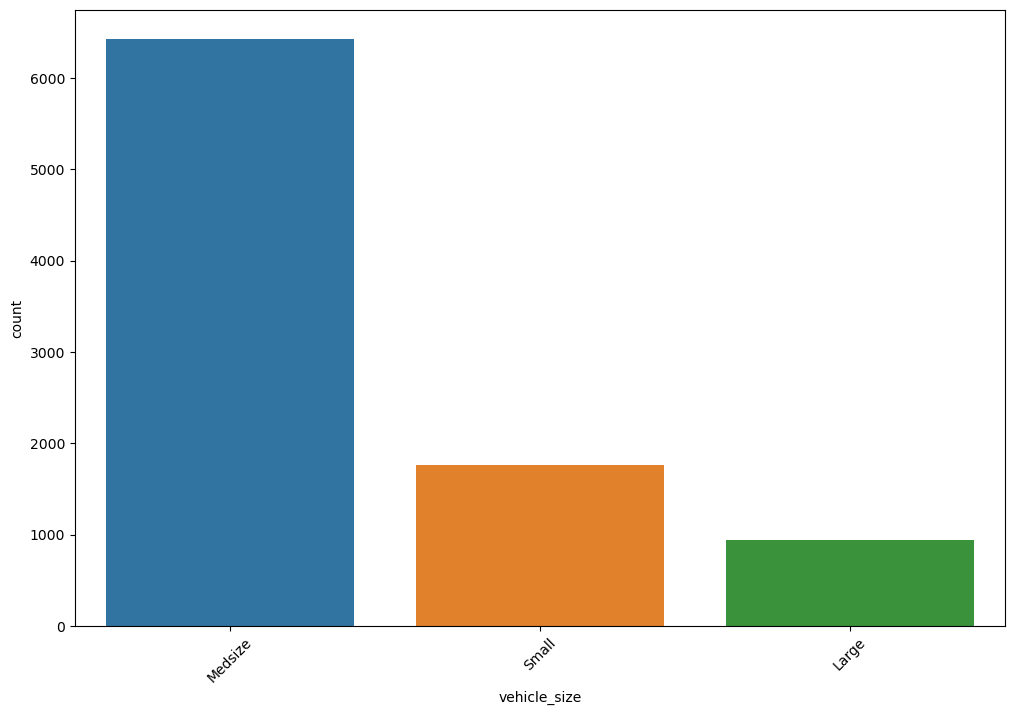

In [159]:
categorical_df(cat_df)

In [160]:
#2

In [161]:
def policy_type_transform(policy):
    if 'Personal' in policy:
        return 'L1'
    elif 'Corporate' in policy:
        return 'L2'
    elif 'Special' in policy:
        return 'L3'

cat_df = cat_df.drop(['policy_type'], axis=1)
cat_df['policy'] = cat_df['policy'].apply(policy_type_transform)


In [162]:
#3.Time dependency analysis

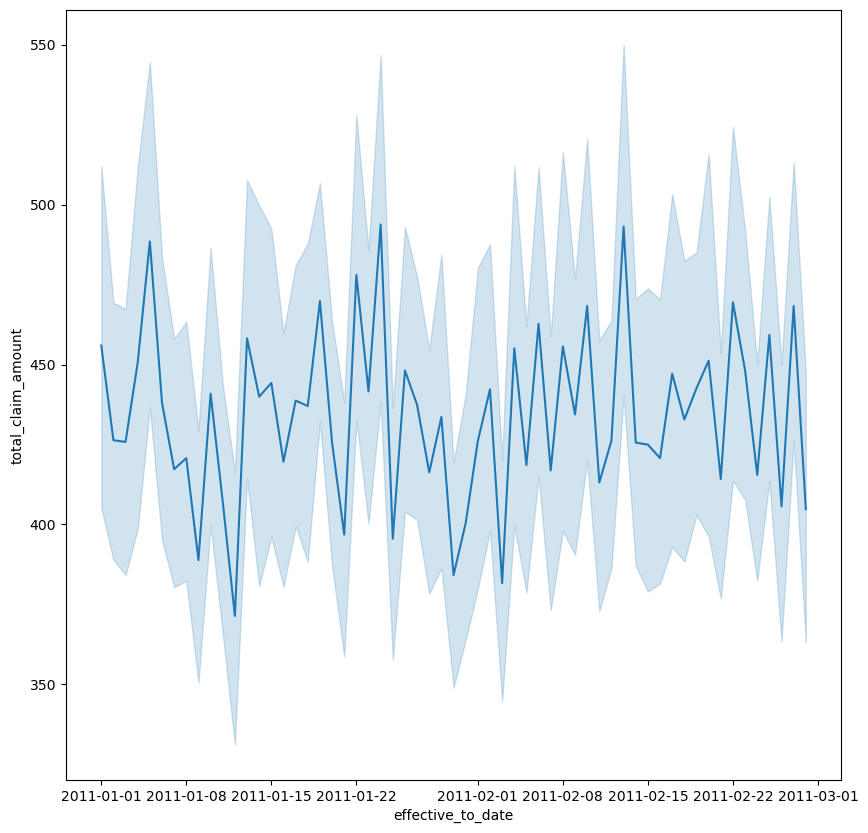

In [163]:
plt.figure(figsize=(10,10))
sns.lineplot(x="effective_to_date", y="total_claim_amount", data=customer_df)
plt.show()


In [164]:
#4. Continue analysis and define empty pd df new columns

In [165]:
date_df = pd.DataFrame()

date_df['day'] = customer_df['effective_to_date'].dt.day
date_df['day_name'] = customer_df['effective_to_date'].dt.day_name()
date_df['week'] = customer_df['effective_to_date'].dt.week
date_df['month'] = customer_df['effective_to_date'].dt.month_name()
date_df['total_claim_amount'] = customer_df['total_claim_amount']


C:\Users\Playtime\AppData\Local\Temp\ipykernel_16448\3326935165.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  date_df['week'] = customer_df['effective_to_date'].dt.week


In [166]:
date_df

,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879
...,...,...,...,...,...
9129,10,Thursday,6,February,198.234764
9130,12,Saturday,6,February,379.200000
9131,6,Sunday,5,February,790.784983
9132,3,Thursday,5,February,691.200000


In [167]:
#5.Compute the total target column aggregated day_name

In [168]:
total_by_day = date_df.groupby('day_name')['total_claim_amount'].sum().round(2)
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_by_day = pd.DataFrame(total_by_day.reindex(index=list_of_correct_days))
total_by_day


,total_claim_amount
day_name,
Monday,655689.71
Tuesday,502518.93
Wednesday,541563.05
Thursday,541820.80
Friday,533658.79
Saturday,608060.10
Sunday,581655.66


In [169]:
#6. Use a seaborn line plot to plot the previous series.

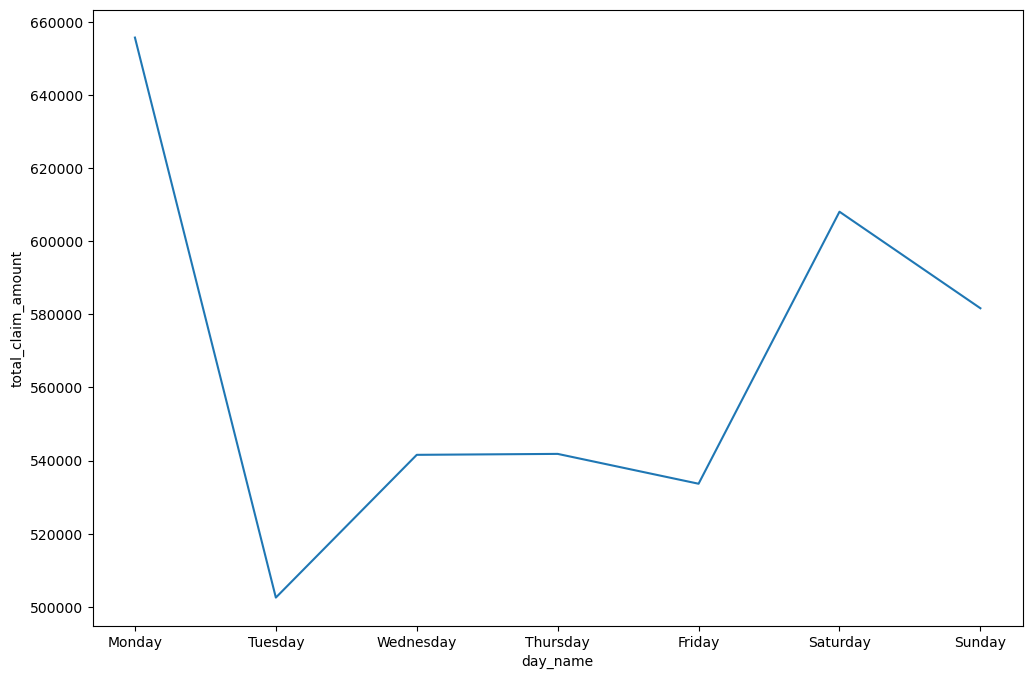

In [170]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=total_by_day, x=total_by_day.index, y='total_claim_amount')
plt.show()

In [171]:
median_by_day = total_by_day.groupby('day_name')['total_claim_amount'].median()
median_by_day = pd.DataFrame(median_by_day.sort_values(ascending=False))
median_by_day

,total_claim_amount
day_name,
Monday,655689.71
Saturday,608060.10
Sunday,581655.66
Thursday,541820.80
Wednesday,541563.05
Friday,533658.79
Tuesday,502518.93


In [172]:
median_by_day

,total_claim_amount
day_name,
Monday,655689.71
Saturday,608060.10
Sunday,581655.66
Thursday,541820.80
Wednesday,541563.05
Friday,533658.79
Tuesday,502518.93


<AxesSubplot:xlabel='day_name', ylabel='total_claim_amount'>

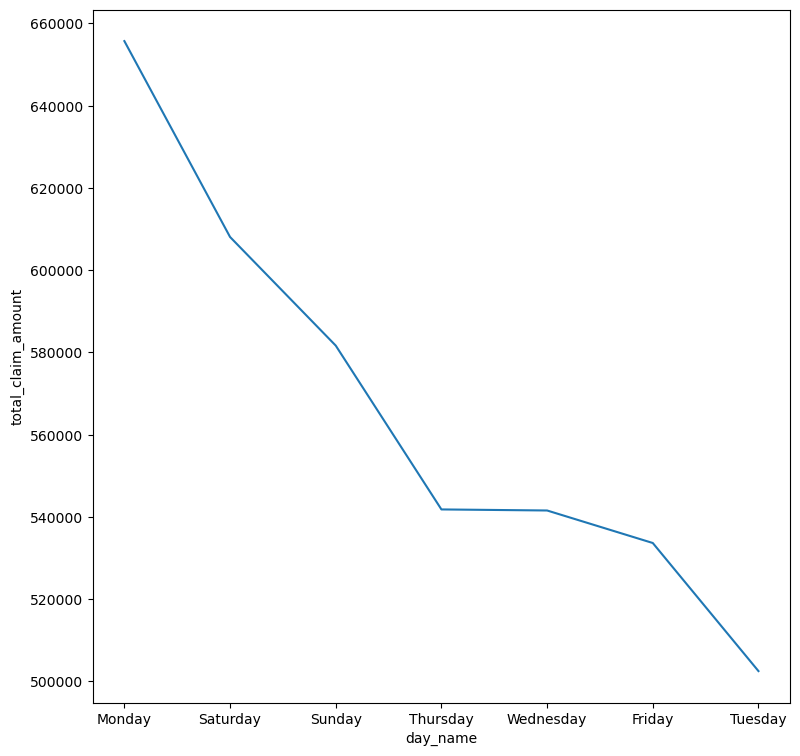

In [173]:
plt.figure(figsize=(9, 9))
sns.lineplot(data=median_by_day, x="day_name", y="total_claim_amount")

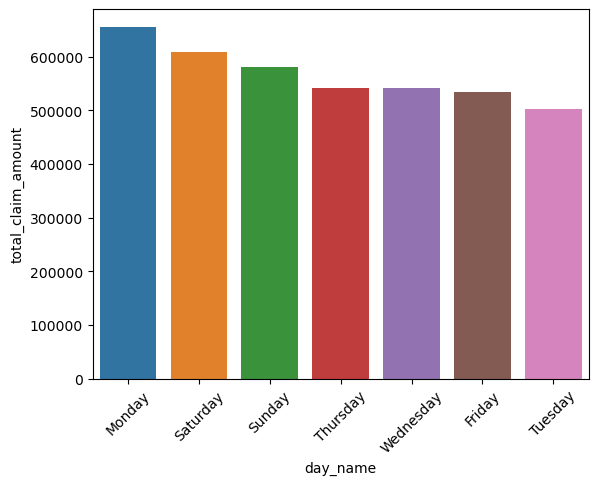

In [174]:
sns.barplot(x=median_by_day.index, y='total_claim_amount', data=median_by_day, order=median_by_day.index)
plt.xticks(rotation=45)
plt.show()

In [175]:
#10

In [176]:
# 11. Compute the total `target` column aggregated `month` rounded

In [177]:
month_total = date_df.groupby(['month']).agg({'total_claim_amount': 'sum'}).round(2)
list_of_correct_values = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_total = month_total.reindex(index=list_of_correct_values)


In [178]:
month_total

,total_claim_amount
month,
January,2117142.86
February,1847824.19
March,NaN
April,NaN
May,NaN
June,NaN
July,NaN
August,NaN
September,NaN


In [179]:
#A lot of NaN values

In [180]:
#No, we cannot do a monthly analysis given the output of the previous series because we have aggregated the target variable, and we do not have access to the underlying data to perform any further analysis.

In [181]:
#13. Function to remove outliers

In [182]:
def remove_outliers(df, thr=3):
    # Loop through each column in the dataframe
    for col in df.columns:
        # Calculate the mean and standard deviation
        col_mean = df[col].mean()
        col_std = df[col].std()

        # Create a boolean mask for the outliers
        outliers_mask = np.abs(df[col] - col_mean) > thr * col_std

        # Replace the outliers with NaN values
        df.loc[outliers_mask, col] = np.nan

    # Drop rows with any NaN values and reset the index
    clean_df = df.dropna().reset_index(drop=True)

    return clean_df


In [183]:
#14. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

In [184]:
continuous_clean_df = remove_outliers(continuous_df)

In [185]:
#15. Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df.

In [186]:
continuous_clean_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,384.811147
1,6979.535903,0.0,94.0,42.0,1131.464935
2,12887.431650,48767.0,108.0,38.0,566.472247
3,7645.861827,0.0,106.0,65.0,529.881344
4,2813.692575,43836.0,73.0,44.0,138.130879
...,...,...,...,...,...
8665,23405.987980,71941.0,73.0,89.0,198.234764
8666,3096.511217,21604.0,79.0,28.0,379.200000
8667,8163.890428,0.0,85.0,37.0,790.784983
8668,7524.442436,21941.0,96.0,3.0,691.200000


In [187]:
discrete_df

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


In [188]:
cat_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L2,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,L1,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L1,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,L2,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,L1,Offer3,Branch,Four-Door Car,Large


In [189]:
new_data = pd.concat([continuous_clean_df, discrete_df, cat_df, date_df['week']], axis=1)
new_data = new_data.dropna().reset_index(drop=True)
new_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,week
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,Washington,No,...,Employed,F,Suburban,Married,L2,Offer1,Agent,Two-Door Car,Medsize,8
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,No,...,Unemployed,F,Suburban,Single,L1,Offer3,Agent,Four-Door Car,Medsize,5
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,No,...,Employed,F,Suburban,Married,L1,Offer1,Agent,Two-Door Car,Medsize,7
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,California,No,...,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,3
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,Washington,No,...,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8665,23405.987980,71941.0,73.0,89.0,198.234764,21,1,6,California,No,...,Medical Leave,M,Suburban,Married,L2,Offer1,Web,Four-Door Car,Medsize,2
8666,3096.511217,21604.0,79.0,28.0,379.200000,25,0,1,California,No,...,Medical Leave,F,Rural,Married,L1,Offer2,Branch,Four-Door Car,Medsize,4
8667,8163.890428,0.0,85.0,37.0,790.784983,23,0,1,California,No,...,Unemployed,M,Suburban,Single,L2,Offer2,Call Center,Two-Door Car,Small,6
8668,7524.442436,21941.0,96.0,3.0,691.200000,11,0,6,California,No,...,Unemployed,M,Suburban,Single,L1,Offer3,Agent,Four-Door Car,Medsize,1


In [190]:
new_data.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'week'],
      dtype='object')

In [191]:
new_data = new_data.reindex(columns=['customer_lifetime_value', 'income', 'monthly_premium_auto',
                         'months_since_policy_inception', 'months_since_last_claim', 
                         'number_of_open_complaints', 'number_of_policies', 'state',
                         'response', 'coverage', 'education', 'employmentstatus', 'gender',
                         'location_code', 'marital_status', 'policy', 'renew_offer_type',
                         'sales_channel', 'vehicle_class', 'vehicle_size', 'week', 
                         'total_claim_amount'])

In [192]:
new_data['response'].unique()

array(['No', 'Yes'], dtype=object)

In [193]:
new_data['response'] = new_data['response'].replace({'Yes': 1, 'No': 0})

In [194]:
new_data['education'] = new_data['education'].replace({'Master': 'Graduate', 'Doctor': 'Graduate'})
new_data['education'].unique()

array(['Bachelor', 'College', 'Graduate', 'High School or Below'],
      dtype=object)

In [195]:
new_data['employmentstatus'] = new_data['employmentstatus'].replace({'Medical Leave': 'Inactive', 'Disabled': 'Inactive', 'Retired': 'Inactive'})
new_data['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Inactive'], dtype=object)

In [196]:
new_data['gender'].unique()
new_data['gender'] = new_data['gender'].replace({'F': 1, 'M': 0})

In [197]:
new_data['gender'].unique()

array([1, 0], dtype=int64)

In [198]:
new_data['vehicle_class'].replace(['Sports Car', 'Luxury SUV', 'Luxury Car'], 'Luxury', inplace=True)
new_data['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'], dtype=object)

In [199]:
new_data['coverage'] = new_data['coverage'].replace({'Basic': 1,'Extended': 2,'Premium': 3})

In [200]:
new_data['employmentstatus'] = new_data['employmentstatus'].replace({'Unemployed': 1,'Inactive': 2,'Employed': 3})

In [201]:
new_data['location_code'] = new_data['location_code'].replace({'Rural': 1,'Suburban': 2,'Urban': 3})

In [202]:
new_data['vehicle_size'] = new_data['vehicle_size'].replace({'Small': 1,'Midsize': 2,'Large': 3})

In [203]:
display(new_data['coverage'].unique())
display(new_data['employmentstatus'].unique())
display(new_data['location_code'].unique())
display(new_data['vehicle_size'].unique())

array([1, 2, 3], dtype=int64)

array([3, 1, 2], dtype=int64)

array([2, 1, 3], dtype=int64)

array(['Medsize', 1, 3], dtype=object)

In [204]:
new_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,week,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,0,1,...,1,2,Married,L2,Offer1,Agent,Two-Door Car,Medsize,8,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,0,2,...,1,2,Single,L1,Offer3,Agent,Four-Door Car,Medsize,5,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,0,3,...,1,2,Married,L1,Offer1,Agent,Two-Door Car,Medsize,7,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,California,0,1,...,0,2,Married,L2,Offer1,Call Center,SUV,Medsize,3,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,0,1,...,0,1,Single,L1,Offer1,Agent,Four-Door Car,Medsize,5,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8665,23405.987980,71941.0,73.0,89.0,21,1,6,California,0,1,...,0,2,Married,L2,Offer1,Web,Four-Door Car,Medsize,2,198.234764
8666,3096.511217,21604.0,79.0,28.0,25,0,1,California,0,1,...,1,1,Married,L1,Offer2,Branch,Four-Door Car,Medsize,4,379.200000
8667,8163.890428,0.0,85.0,37.0,23,0,1,California,0,2,...,0,2,Single,L2,Offer2,Call Center,Two-Door Car,1,6,790.784983
8668,7524.442436,21941.0,96.0,3.0,11,0,6,California,0,1,...,0,2,Single,L1,Offer3,Agent,Four-Door Car,Medsize,1,691.200000


In [205]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8670 entries, 0 to 8669
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        8670 non-null   float64
 1   income                         8670 non-null   float64
 2   monthly_premium_auto           8670 non-null   float64
 3   months_since_policy_inception  8670 non-null   float64
 4   months_since_last_claim        8670 non-null   int64  
 5   number_of_open_complaints      8670 non-null   int64  
 6   number_of_policies             8670 non-null   int64  
 7   state                          8670 non-null   object 
 8   response                       8670 non-null   int64  
 9   coverage                       8670 non-null   int64  
 10  education                      8670 non-null   object 
 11  employmentstatus               8670 non-null   int64  
 12  gender                         8670 non-null   i

In [206]:
# Identify the categorical nominal columns
categorical_nominal_cols = []
for col in new_data.columns:
    if new_data[col].dtype == object and new_data[col].nunique() < 10:
        categorical_nominal_cols.append(col)

# Create a new dataframe with the categorical nominal columns
categorical_nominal_data = new_data[categorical_nominal_cols]

categorical_nominal_data

,state,education,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,Bachelor,Married,L2,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,Bachelor,Single,L1,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,Bachelor,Married,L1,Offer1,Agent,Two-Door Car,Medsize
3,California,Bachelor,Married,L2,Offer1,Call Center,SUV,Medsize
4,Washington,Bachelor,Single,L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...
8665,California,College,Married,L2,Offer1,Web,Four-Door Car,Medsize
8666,California,Graduate,Married,L1,Offer2,Branch,Four-Door Car,Medsize
8667,California,High School or Below,Single,L2,Offer2,Call Center,Two-Door Car,1
8668,California,High School or Below,Single,L1,Offer3,Agent,Four-Door Car,Medsize


In [207]:
# create a list of the categorical nominal columns
categorical_nominal_cols = ['state', 'response', 'education', 'employmentstatus', 'gender', 'marital_status', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class']

# create a list of named levels
levels = []

# loop through each categorical nominal column and get its unique values
for col in categorical_nominal_cols:
    unique_vals = new_data[col].unique()
    levels.append(list(unique_vals))

print(levels)

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'], [0, 1], ['Bachelor', 'College', 'Graduate', 'High School or Below'], [3, 1, 2], [1, 0], ['Married', 'Single', 'Divorced'], ['L2', 'L1', 'L3'], ['Offer1', 'Offer3', 'Offer2', 'Offer4'], ['Agent', 'Call Center', 'Web', 'Branch'], ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury']]


In [208]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', categories='levels')

In [209]:
encoder

OneHotEncoder(categories='levels', drop='first')

In [210]:
levels

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
 [0, 1],
 ['Bachelor', 'College', 'Graduate', 'High School or Below'],
 [3, 1, 2],
 [1, 0],
 ['Married', 'Single', 'Divorced'],
 ['L2', 'L1', 'L3'],
 ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
 ['Agent', 'Call Center', 'Web', 'Branch'],
 ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury']]

# Lab | comparing regression models

In [211]:
new_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,...,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,week,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,0,1,...,1,2,Married,L2,Offer1,Agent,Two-Door Car,Medsize,8,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,0,2,...,1,2,Single,L1,Offer3,Agent,Four-Door Car,Medsize,5,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,0,3,...,1,2,Married,L1,Offer1,Agent,Two-Door Car,Medsize,7,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,California,0,1,...,0,2,Married,L2,Offer1,Call Center,SUV,Medsize,3,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,0,1,...,0,1,Single,L1,Offer1,Agent,Four-Door Car,Medsize,5,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8665,23405.987980,71941.0,73.0,89.0,21,1,6,California,0,1,...,0,2,Married,L2,Offer1,Web,Four-Door Car,Medsize,2,198.234764
8666,3096.511217,21604.0,79.0,28.0,25,0,1,California,0,1,...,1,1,Married,L1,Offer2,Branch,Four-Door Car,Medsize,4,379.200000
8667,8163.890428,0.0,85.0,37.0,23,0,1,California,0,2,...,0,2,Single,L2,Offer2,Call Center,Two-Door Car,1,6,790.784983
8668,7524.442436,21941.0,96.0,3.0,11,0,6,California,0,1,...,0,2,Single,L1,Offer3,Agent,Four-Door Car,Medsize,1,691.200000


In [230]:
X = new_data.drop(['total_claim_amount'],axis=1)
y = new_data['total_claim_amount']

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1337)

In [232]:
X_train_num = X_train.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(include='object')
X_test_num = X_test.select_dtypes(include='number')
X_test_cat = X_test.select_dtypes(include='object')

In [233]:
from sklearn.preprocessing import OneHotEncoder

# Create a list of named levels for each categorical column
levels = [
    X_train_cat[col].unique().tolist() for col in X_train_cat.columns
]

# instantiate OneHotEncoder
encoder = OneHotEncoder(drop='first', categories=levels)

# fit and transform the training set
X_train_cat_encoded = encoder.fit_transform(X_train_cat).toarray()
X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded,
                                      columns=encoder.get_feature_names_out(X_train_cat.columns),
                                      index=X_train_cat.index)

# transform the test set
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded,
                                     columns=encoder.get_feature_names_out(X_test_cat.columns),
                                     index=X_test_cat.index)

In [236]:
X_train_cat_encoded_df

,state_California,state_Washington,state_Nevada,state_Arizona,education_Bachelor,education_College,education_Graduate,marital_status_Married,marital_status_Single,policy_L2,...,renew_offer_type_Offer4,renew_offer_type_Offer1,sales_channel_Web,sales_channel_Call Center,sales_channel_Branch,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,vehicle_size_3,vehicle_size_1
6232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2086,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7982,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5043,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7110,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5593,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3239,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [237]:
from sklearn.preprocessing import PowerTransformer

# instantiate the power transformer
pt = PowerTransformer()

# fit and transform the numerical data in X_train and X_test
X_train_num_transformed = pt.fit_transform(X_train_num)
X_test_num_transformed = pt.transform(X_test_num)

# convert the resulting numpy arrays to pandas dataframes
X_train_num_transformed_df = pd.DataFrame(X_train_num_transformed, columns=X_train_num.columns, index=X_train_num.index)
X_test_num_transformed_df = pd.DataFrame(X_test_num_transformed, columns=X_test_num.columns, index=X_test_num.index)

C:\Users\Playtime\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [238]:
X_train_num_transformed_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,coverage,employmentstatus,gender,location_code,week
6232,0.0,0.215984,0.072516,1.463233,-1.103198,-0.517333,-0.048082,2.420254,-0.791540,-1.489538,0.976709,0.050206,-0.022282
2086,0.0,1.098874,-0.514200,-0.326285,0.168100,-0.517333,1.139696,-0.413180,-0.791540,-0.758909,0.976709,0.050206,0.522876
7982,0.0,0.236109,0.752114,-1.287864,-0.021491,-0.517333,-1.138922,-0.413180,1.145903,0.763379,0.976709,1.674580,0.721492
5043,0.0,-0.164133,0.390420,1.232349,-0.682896,-0.517333,1.139696,-0.413180,-0.791540,0.763379,-1.023847,0.050206,-0.422193
7110,0.0,0.221937,0.844066,-0.965509,0.910668,1.880100,-1.138922,-0.413180,-0.791540,0.763379,0.976709,0.050206,-1.891779
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5593,0.0,0.192766,1.009570,-0.879443,-0.813332,-0.517333,-0.048082,-0.413180,1.586173,-0.758909,-1.023847,0.050206,0.721492
3239,0.0,0.616730,-0.656071,-0.477034,-0.682896,1.880100,-1.138922,-0.413180,1.145903,0.763379,0.976709,-1.614143,0.888895
860,0.0,0.590278,2.065540,-1.337341,-0.952675,-0.517333,-0.048082,2.420254,1.145903,-1.489538,0.976709,0.050206,0.888895
8381,0.0,0.726498,0.546408,0.965026,0.347054,1.880100,1.664910,2.420254,-0.791540,-0.758909,-1.023847,0.050206,0.281337


In [219]:
#

In [239]:
X_train_new = pd.concat([X_train_num_transformed_df, X_train_cat_encoded_df], axis=1)
X_test_new = pd.concat([X_test_num_transformed_df, X_test_cat_encoded_df], axis=1)

In [240]:
#

In [241]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_new_scaled = scaler.fit_transform(X_train_new)
X_test_new_scaled = scaler.transform(X_test_new)

X_train_new_scaled_df = pd.DataFrame(X_train_new_scaled, columns=X_train_new.columns, index=X_train_new.index)
X_test_new_scaled_df = pd.DataFrame(X_test_new_scaled, columns=X_test_new.columns, index=X_test_new.index)

In [242]:
#

In [248]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X_train_new_scaled_df, y_train)

# Get predictions for the training and test data
y_train_pred = lr.predict(X_train_new_scaled_df)
y_test_pred = lr.predict(X_test_new_scaled_df)

In [249]:
train_preds

array([384.25964485, 258.30817432, 496.65363934, ..., 599.61762856,
       389.39946498, 476.23993502])

In [250]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def get_error_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    df_metrics = pd.DataFrame({
        'Error_metric': ['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'],
        'Value': [mae, mse, rmse, mape, r2]
    })

    return df_metrics

In [251]:
#

In [252]:
df_metrics_train = get_error_metrics(y_train, y_train_pred)
df_metrics_test = get_error_metrics(y_test, y_test_pred)

In [253]:
#

In [254]:
train_metrics = get_error_metrics(y_train, y_train_pred)
print('Train Metrics:')
print(train_metrics)

# Calculate the metrics for the test set
test_metrics = get_error_metrics(y_test, y_test_pred)
print('Test Metrics:')
print(test_metrics)

Train Metrics:
  Error_metric         Value
0          MAE    137.261616
1          MSE  33049.558689
2         RMSE    181.795376
3         MAPE    206.073037
4           R2      0.391737
Test Metrics:
  Error_metric         Value
0          MAE    139.703417
1          MSE  33955.500683
2         RMSE    184.270184
3         MAPE    285.635548
4           R2      0.372469


In [255]:
#

In [256]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

def train_models(model_list, X_train, y_train):
    trained_models = []
    for model in model_list:
        if model == 'LinearRegressor':
            reg = LinearRegression()
        elif model == 'KNeighborsRegressor':
            reg = KNeighborsRegressor()
        elif model == 'MLPRegressor':
            reg = MLPRegressor()
        else:
            raise ValueError(f"Invalid model name: {model}")
        reg.fit(X_train, y_train)
        trained_models.append(reg)
    return trained_models

In [257]:
#

In [263]:
model_list = ['LinearRegressor', 'KNeighborsRegressor', 'MLPRegressor']
trained_models = train_models(model_list, X_train_new_scaled_df, y_train)

C:\Users\Playtime\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [259]:
#

In [264]:
trained_models

[KNeighborsRegressor(), MLPRegressor(max_iter=1000)]

In [265]:
trained_models_test = train_models(model_list, X_test_new_scaled_df, y_test)

In [266]:
trained_models_test

[KNeighborsRegressor(), MLPRegressor(max_iter=1000)]